In [ ]:
# Load the dataset
file_path = r'C:\Users\rashm\OneDrive\Documents\Numpy Ninja\Python Hackathon\OrganDonor_Consolidated.xlsx'
df = pd.ExcelFile(file_path)
donor_details = df.parse('DonorDetails')
outcomes = df.parse('Outcomes')
referral_details = df.parse('ReferralDetails')
hosp_details = df.parse('OPO_HospDetails')
yearly_outcomes = df.parse('Yearly_Outcomes')

# Create dataset for analysis
merged_data = pd.merge(donor_details, referral_details, on='PatientID', how='outer')
merged_data = pd.merge(merged_data, outcomes, on='PatientID', how='outer')
merged_data = pd.merge(merged_data, hosp_details, on='PatientID', how='outer')

#### Q.48 Show a bar plot of the number of patients by race?

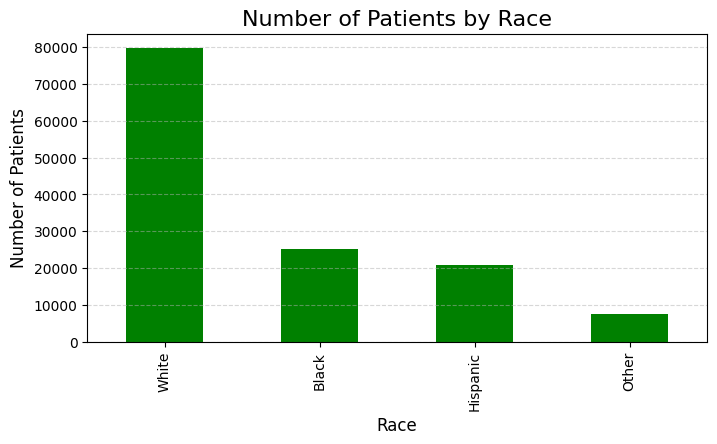

In [213]:
# count the no. of patients by race
race_counts = donor_details['race'].value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 4))
race_counts.plot(kind='bar', color='green')

# Customize the plot
plt.title('Number of Patients by Race', fontsize=16)
plt.xlabel('Race', fontsize= 12)
plt.ylabel('Number of Patients', fontsize = 12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


#### Q59. What % of the dataset is male vs female?

In [97]:
gender_count = donor_details['gender'].value_counts()

# Calculate % of male and female
gender_percentages = gender_count / len(donor_details) *100

print(gender_percentages)

gender
M    58.805719
F    41.148451
Name: count, dtype: float64


#### Q60. How many patients of each race are listed under an Unknown cause of death?

In [ ]:
# Filter the dataset for patients with an "Unknown" cause of death
unknown_cause = donor_details[donor_details['causeofdeath'] == 'Unknown']

race_counts = unknown_cause['race'].value_counts()

print(race_counts)

race
White       15994
Black        4970
Hispanic     4181
Other        1635
Name: count, dtype: int64


#### Q65. List any 10 donors that are not there in the outcomes sheet.

In [102]:
# Extract donor IDs from both sheets
donor_ids = set(donor_details['PatientID'])
outcome_ids = set(outcomes['PatientID'])

# Find donors in DonorDetails but not in Outcomes
missing_donors = list(donor_ids - outcome_ids)

# Display any 10 missing donors
print(missing_donors[:10])

['OPO1_P375589', 'OPO2_P244564', 'OPO6_P123424', 'OPO4_P613330', 'OPO2_P953058', 'OPO2_P46428', 'OPO4_P758430', 'OPO6_P841985', 'OPO1_P760715', 'OPO5_P858006']


#### Q.67 Plot a time series line graph showing yearly calculated deaths. Color each line by OPO ID

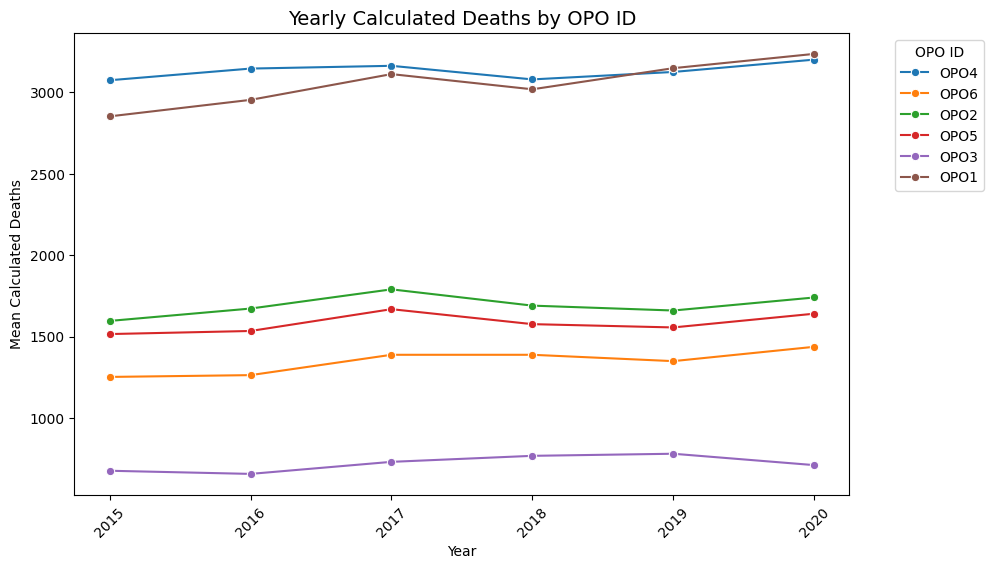

In [ ]:

plt.figure(figsize=(10, 6))

sns.lineplot(data=yearly_outcomes, x='Year', y='mean calc deaths', hue='OPO', marker='o')

# Title and labels
plt.title('Yearly Calculated Deaths by OPO ID', fontsize=14)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Mean Calculated Deaths', fontsize=10)
plt.xticks(rotation=45)
plt.legend(title='OPO ID', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()


#### Q.68 Create any two 2-dimensional arrays and multiply them. Display the resulting array.

In [ ]:
# Create two 2-dimensional arrays
array1 = np.array([[1, 2], [3, 4]])
array2 = np.array([[5, 6], [7, 8]])

# Multiply the arrays
result = np.dot(array1, array2)

print(result)

[[19 22]
 [43 50]]


#### Q.69 Using a bar chart, which mechnism of death had the lowest count of donors?

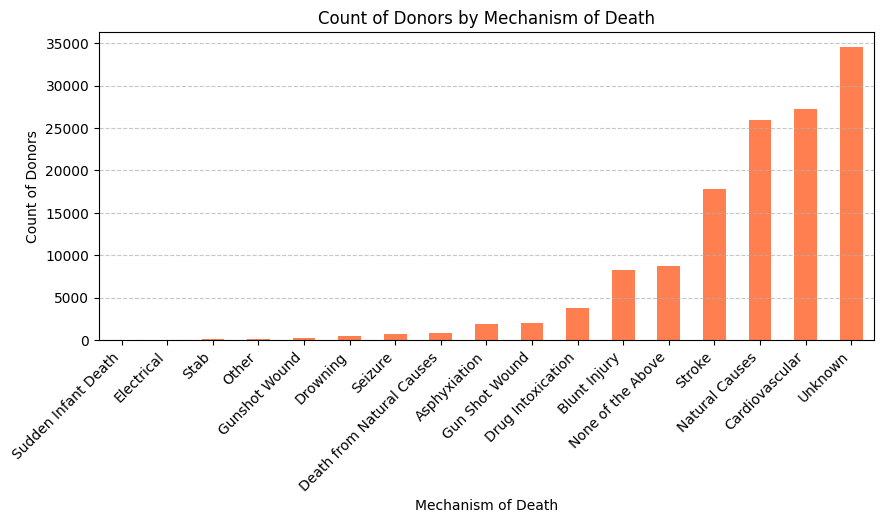

In [ ]:

# Filter out "None of the above" from mechanism_of_death
df_filtered = donor_details[donor_details['mechanism_of_death'] != "None of the above"]

# Group by mechanism_of_death
mechanism_counts = df_filtered['mechanism_of_death'].value_counts()

# Sort the counts in ascending order
mechanism_counts = mechanism_counts.sort_values()

# Plot the bar chart
plt.figure(figsize=(10, 4))
mechanism_counts.plot(kind='bar', color='coral')
plt.xlabel('Mechanism of Death')
plt.ylabel('Count of Donors')
plt.title('Count of Donors by Mechanism of Death')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Q.70 Using arrays and loops find the number of patients who were referred in the month of July.

In [220]:

# Convert 'time_referred' column to datetime
referral_details['time_referred'] = pd.to_datetime(referral_details['time_referred'], format='%m/%d/%y')

july_count = 0

# Use for Loop to count July no's
for date in referral_details['time_referred']:
    if date.month == 7:
        july_count += 1

# Display the result
print(july_count)

11391


#### Q 71. Which year recorded the highest number of organ procurements from patients who died due to stroke as the mechanism of death? Display this information using a bar chart.

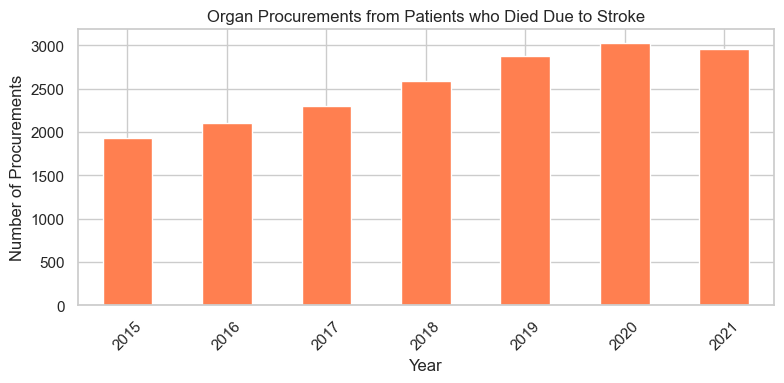

In [312]:
# Filter the data for patients who died due to stroke
stroke_deaths = merged_data[merged_data['mechanism_of_death'] == 'Stroke']

# Group by year and count the number of organ procurements

yearly_procurements = stroke_deaths.groupby('Referral_Year').size()


# Plot the data as a bar chart
plt.figure(figsize=(8, 4))
yearly_procurements.plot(kind='bar', color='coral')


plt.title('Organ Procurements from Patients who Died Due to Stroke')
plt.xlabel('Year')
plt.ylabel('Number of Procurements')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Q.72 Which organ has the highest chance of being successfully transplanted

In [329]:
# List of organ outcome columns
organ_columns = ['outcome_heart', 'outcome_liver', 'outcome_kidney_left', 
                 'outcome_kidney_right', 'outcome_lung_left', 
                 'outcome_lung_right', 'outcome_intestine', 'outcome_pancreas']

# Calculate the transplant success rate for each organ
success_rates = {
    organ: (merged_data[organ] == 'Transplanted').sum() / merged_data[organ].notna().sum()
    for organ in organ_columns
}

# Find the organ with the highest transplant success rate
highest_success_organ = max(success_rates, key=success_rates.get)

print(highest_success_organ)

outcome_liver


#### Q.73 Create a WordCloud Chart with any column of your choice.

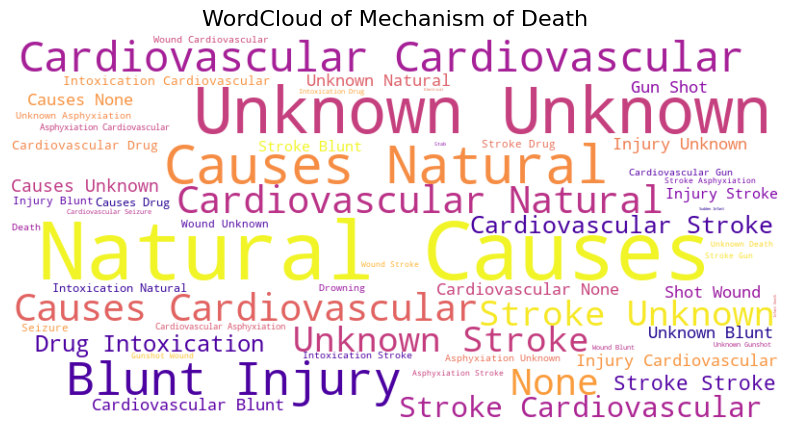

In [167]:
from wordcloud import WordCloud

# Generate text for the WordCloud from the column
text = ' '.join(donor_details['mechanism_of_death'])

# Create the WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='plasma').generate(text)

# Plot the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.title('WordCloud of Mechanism of Death', fontsize=16)
plt.show()


#### Q. 74 Group donors by age into 7 groups using the binning method. Show counts under each bin.

In [275]:
# Define the bin labels
age_bin_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-100']

# Define the bin
age_bins = [0, 10, 20, 30, 40, 50, 60, 100]

# Create a new column 'age_group' to categorize donors based on their age
donor_details['age_group'] = pd.cut(donor_details['age'], bins=age_bins, labels=age_bin_labels, right=False)

# Get the count of donors in each age group
age_group_counts = donor_details['age_group'].value_counts().sort_index()

# Print the counts of donors in each age group
print(age_group_counts)


age_group
0-10       2357
11-20      3091
21-30      6925
31-40      9616
41-50     13931
51-60     25742
61-100    70250
Name: count, dtype: int64


#### Q.75 Can donors who die from cardiac arrest successfully donate their hearts for transplantation? Provide data and evidence from the given dataset to support your answer.

In [281]:
# Filter the dataset for donors who died from cardiac arrest
cardiac_arrest_donors = merged_data[merged_data['causeofdeath'] == 'Cardiac Arrest']

# Calculate the number of cardiac arrest donors whose hearts were successfully transplanted
heart_transplanted = cardiac_arrest_donors['outcome_heart'].apply(lambda x: x == 'Transplanted').sum()

# Calculate the total number of cardiac arrest donors with valid heart outcome data
total_cardiac_arrest_donors = cardiac_arrest_donors['outcome_heart'].notna().sum()

# Print the results
print(f"Number of cardiac arrest donors: {total_cardiac_arrest_donors}")
print(f"Number of successful heart transplants: {heart_transplanted}")

Number of cardiac arrest donors: 21
Number of successful heart transplants: 14


#### Q.76 Which organ has the highest frequency of procurement.

In [323]:
# List of organ outcome columns
organ_columns = ['outcome_heart', 'outcome_liver', 'outcome_kidney_left', 
                 'outcome_kidney_right', 'outcome_lung_left', 
                 'outcome_lung_right', 'outcome_intestine', 'outcome_pancreas']

# Count the number of 'Transplanted' outcomes for each organ
organ_procurement_counts = {organ: (merged_data[organ] == 'Transplanted').sum() for organ in organ_columns}

# Find the organ with the highest procurement frequency
highest_procurement_organ = max(organ_procurement_counts, key=organ_procurement_counts.get)
highest_procurement_count = organ_procurement_counts[highest_procurement_organ]

print(highest_procurement_organ)

outcome_kidney_left


#### Q.77 Using loops, create a multiplication table for the number 8

In [282]:
# Multiplication table for the number 8
multiplier = 8
counter = 1

while counter <= 10:
    result = counter * multiplier
    print(f"{counter} x {multiplier} = {result}")
    counter += 1

1 x 8 = 8
2 x 8 = 16
3 x 8 = 24
4 x 8 = 32
5 x 8 = 40
6 x 8 = 48
7 x 8 = 56
8 x 8 = 64
9 x 8 = 72
10 x 8 = 80


#### Q.78 Display random data by splitting it into 4 quartiles and labeling the quartiles.

In [ ]:
# Generate random data
np.random.seed(0)
data = np.random.randn(100)

# Create a DataFrame
df = pd.DataFrame(data, columns=['Value'])

# Calculate quartiles
df['Quartile'] = pd.qcut(df['Value'], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

# Display the data with quartile labels
print(df)


       Value Quartile
0   1.764052       Q4
1   0.400157       Q3
2   0.978738       Q4
3   2.240893       Q4
4   1.867558       Q4
..       ...      ...
95  0.706573       Q3
96  0.010500       Q2
97  1.785870       Q4
98  0.126912       Q3
99  0.401989       Q3

[100 rows x 2 columns]


#### Q.79 Display all details of the oldest female patient.

In [ ]:
# Filter the data to include only female patients
female_patients = donor_details[donor_details['gender'] == 'F']

# Find the oldest female patient
oldest_female_patient = female_patients.loc[female_patients['age'].idxmax()]

# Details of the oldest female patient
print(oldest_female_patient)

PatientID                     OPO1_P26983
age                                 100.0
gender                                  F
race                                Black
causeofdeath                      Unknown
mechanism_of_death                Unknown
brain_death                             0
time_asystole         2037-01-09 15:00:00
time_brain_death                      NaT
cardiac_arrest                      Other
Name: 290, dtype: object


#### Q.80 Create a point Plot on Age against Cardiac arrest.

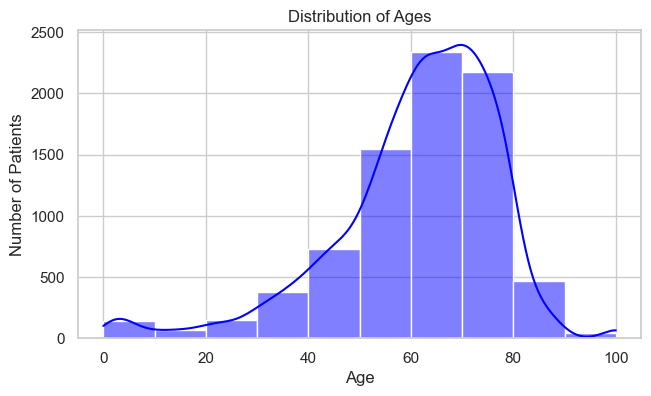

In [334]:
cardiac_arrest_data = donor_details[donor_details['causeofdeath'] == 'Cardiac Arrest']
# Plotting the total number of patients
plt.figure(figsize=(16, 4))

# Histogram of ages
plt.subplot(1, 2, 1)
sns.histplot(cardiac_arrest_data['age'], bins=10, color='blue', kde=True)
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.title('Distribution of Ages')

plt.show()